In [4]:
import PIL
from PIL import Image
import numpy as np
from tensorflow.keras import Sequential


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Dense, Activation, Conv2D

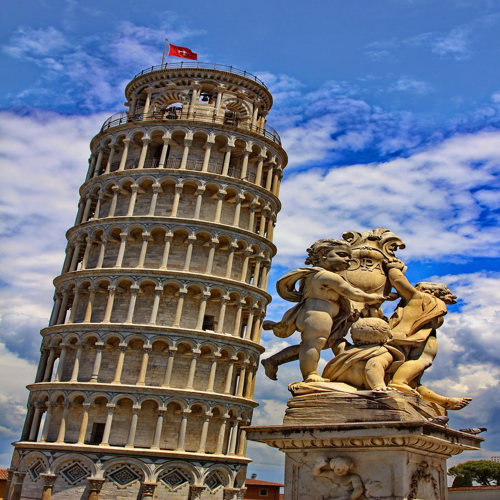

In [6]:
w= 500
h = 500
img= Image.open('pisa.jpg').resize((w,h))
img.show()

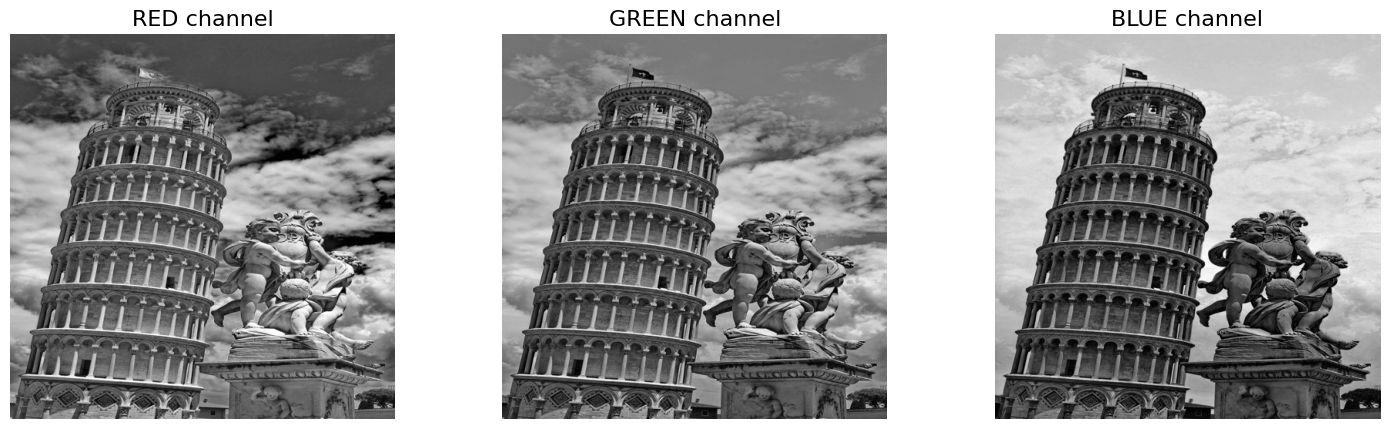

In [8]:
array = np.array(img)
red_section = array[:,:,0]
green_section = array[:,:,1]
blue_section = array[:,:,2]

channels = [red_section, green_section, blue_section]
names= ["RED", 'GREEN', 'BLUE']
plt.figure(figsize=(18,5))

for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(channels[i], cmap='gray')
  plt.axis('off')
  plt.title(f'{names[i]} channel', fontsize=16)

Specifically we will use this kernel for the feature detection:
$$
	\begin{bmatrix} 
	-1 & -1 & -1 \\\\
	-1 & 8 & -1\\\\
	-1 & -1 & -1\\\\
	\end{bmatrix}
	\quad
$$





In [10]:
kernel = np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
]).reshape(3,3,1,1)
b=np.array([0.0])

In [11]:
model =Sequential()
model.add(Conv2D(filters=1, kernel_size=3, input_shape=(w,h,1), padding='same', activation='relu'))
model.set_weights([kernel,b])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 500, 500, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 88ms/step


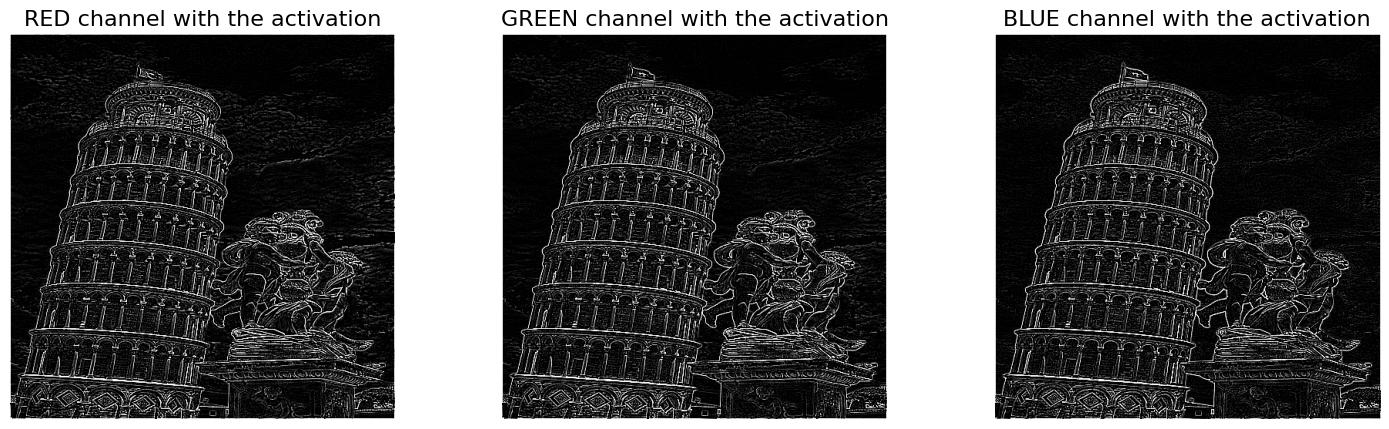

In [12]:
acts= []
plt.figure(figsize=(18,5))
for i in range(3):
  plt.subplot(1,3,i+1)
  inputs = channels[i].reshape((1,h,w,1))
  act = model.predict(inputs).squeeze(0).squeeze(2).astype('int').clip(0,255)
  acts.append(act)
  plt.imshow(act, cmap='gray')
  plt.axis('off')
  plt.title(f'{names[i]} channel with the activation', fontsize=16)

(-0.5, 499.5, 499.5, -0.5)

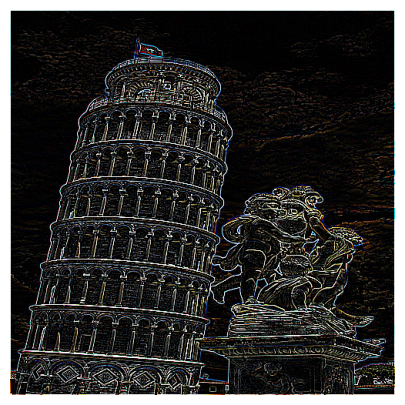

In [14]:
# Stacking all the 3 images
arr_stacked = np.dstack((acts[0],acts[1],acts[2]))
plt.figure(figsize=(18,5))
plt.imshow(arr_stacked)
plt.axis('off')

Since we applied the edge detector on the three color channels separately, once we merge the results after the convolutions we obtain colorful edges of the car. Each colored edge that you see in the picture above is contributed by some degree of red edges detected in channel R, green edges detected in channel G, and blue edges in channel B.
